# Laboratorium 3 – Raport z analizy tekstur
## Autor: Jakub Strzałka 259144

### Importy

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from skimage import io, color
from skimage.feature import graycomatrix, graycoprops
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 1. Wczytanie i próbkowanie obrazów (przykładowa symulacja działania)

In [3]:
def crop_texture_samples(image_path, crop_size=(128, 128)):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (512, 512))
    crops = []
    for i in range(0, 512, crop_size[0]):
        for j in range(0, 512, crop_size[1]):
            crop = img_resized[i:i+crop_size[0], j:j+crop_size[1]]
            crops.append(crop)
    return crops

### Przykład: wyświetlenie próbek

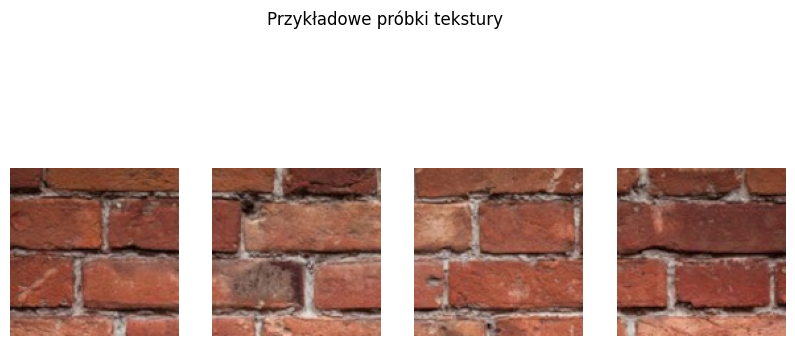

In [9]:
example_crops = crop_texture_samples("img/cegla.jpg") if os.path.exists("img/cegla.jpg") else []
if example_crops:
    plt.figure(figsize=(10, 5))
    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.imshow(cv2.cvtColor(example_crops[i], cv2.COLOR_BGR2RGB))
        plt.axis('off')
    plt.suptitle("Przykładowe próbki tekstury")
    plt.show()

## 2. Ekstrakcja cech GLCM z obrazów

In [10]:
def extract_texture_features(image, distances=[1, 3, 5], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4]):
    gray_image = color.rgb2gray(image)
    gray_image = np.round(gray_image * 63).astype(np.uint8)
    features = []
    for d in distances:
        for a in angles:
            glcm = graycomatrix(gray_image, [d], [a], levels=64, symmetric=True, normed=True)
            for prop in ['dissimilarity', 'correlation', 'contrast', 'energy', 'homogeneity', 'ASM']:
                val = graycoprops(glcm, prop).mean()
                features.append(val)
    return features

### Przykład: analiza jednej próbki

In [11]:
if example_crops:
    example_features = extract_texture_features(example_crops[0])
    print("Przykładowy wektor cech (GLCM):")
    print(example_features)

Przykładowy wektor cech (GLCM):
[np.float64(1.4606914370078738), np.float64(0.9404282857339529), np.float64(5.066498523622047), np.float64(0.1028426210787061), np.float64(0.5181101570117584), np.float64(0.010576604710338326), np.float64(2.7379874759749523), np.float64(0.809014769545411), np.float64(16.21458242916486), np.float64(0.08189445449345077), np.float64(0.36191689279182215), np.float64(0.00670670167677988), np.float64(2.4747170275590555), np.float64(0.8397019589495289), np.float64(13.609928641732285), np.float64(0.08546015378926233), np.float64(0.3885561317061619), np.float64(0.007303437885684368), np.float64(2.7823795647591294), np.float64(0.8005117094073493), np.float64(16.936511873023747), np.float64(0.0814426676478977), np.float64(0.3593192711993194), np.float64(0.006632908113605922), np.float64(2.8915), np.float64(0.7658729900736563), np.float64(19.939999999999998), np.float64(0.07924979051628465), np.float64(0.3513866633091813), np.float64(0.006280529296875), np.float64(4

## 3. Klasyfikacja – przykład działania klasyfikatora SVM

In [12]:
def run_classification_from_csv(csv_path):
    df = pd.read_csv(csv_path)
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    if len(set(y)) < 2:
        print(f"Pominięto plik {csv_path} (tylko jedna klasa).")
        return
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Dokładność klasyfikatora (plik {os.path.basename(csv_path)}): {acc:.2%}")

### Przykład: klasyfikacja na podstawie pliku CSV

In [13]:
csv_example = "output_csv/all_textures.csv"
if os.path.exists(csv_example):
    run_classification_from_csv(csv_example)
else:
    print(f"Plik {csv_example} nie został znaleziony.")


Dokładność klasyfikatora (plik all_textures.csv): 95.00%
